<a href="https://colab.research.google.com/github/ralphcajipe/mnist-classifier-convnet/blob/main/mnist_classifier_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (convnet)
This example demonstrates how to implement a Convolutional Neural Network model (convnet) using a stack of `Conv2D` and `MaxPooling2D` layers that **classifies** MNIST digits. <br> 

Convnets are the best type of machine learning models for computer vision tasks. It's possible to train one from scratch even on a very small dataset like MNIST, with decent results.

Data: <br>
https://www.tensorflow.org/datasets/catalog/mnist <br>
https://paperswithcode.com/dataset/mnist 


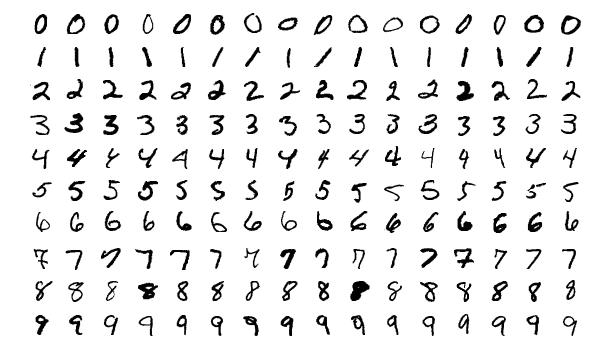

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Preparing the data

In [ ]:
from tensorflow.keras.datasets import mnist

# Preparing the image data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60_000, 28, 28, 1)
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape(10_000, 28, 28, 1)
test_images = test_images.astype("float32") / 255

# Implementation of the Convolutional Neural Network
Instantiating a small convnet (the network architecture)

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

# Build the convnet


In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_convnet_model")
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "mnist_convnet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128) 

# Train the model
Training the convnet on MNIST images

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 52s 69ms/step - loss: 0.1807 - accuracy: 0.9433 - val_loss: 0.0691 - val_accuracy: 0.9787
Epoch 2/5
750/750 [==============================] - 53s 71ms/step - loss: 0.0501 - accuracy: 0.9852 - val_loss: 0.0517 - val_accuracy: 0.9847
Epoch 3/5
750/750 [==============================] - 53s 71ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0479 - val_accuracy: 0.9869
Epoch 4/5
750/750 [==============================] - 52s 69ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0410 - val_accuracy: 0.9887
Epoch 5/5
750/750 [==============================] - 52s 69ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0379 - val_accuracy: 0.9893


# Evaluating the convnet model on new data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 4s 13ms/step - loss: 0.0271 - accuracy: 0.9927
Test accuracy: 0.993


The basic convnet has a great test set accuracy of 99.3%!

# Using the model to make predictions on new data

Predict index 0 in the test set

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 4s 13ms/step


array([1.8112728e-11, 8.2007805e-13, 1.3251929e-08, 8.4574445e-08,
       1.2097057e-12, 1.2940289e-11, 3.1090260e-18, 9.9999934e-01,
       6.2441977e-08, 3.8199786e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
# Check that the test label agrees:
test_labels[0]

7

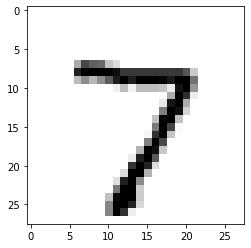

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
predictions[10]

array([9.9999994e-01, 7.6043775e-16, 9.5513863e-09, 1.1840045e-13,
       5.2032887e-17, 7.3378782e-11, 5.5956806e-10, 9.6111397e-10,
       3.1322420e-10, 4.1131884e-10], dtype=float32)

Predict what's index 10 in the test set

In [ ]:
predictions[10].argmax()

0

In [ ]:
# Check that the test label agrees:
test_labels[10]

0

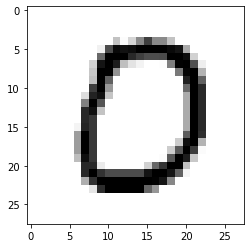

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_images[10].reshape(28, 28), cmap=plt.cm.binary)
plt.show()